Importing the Dependencies


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [2]:
# loading the diabetes dataset to a pandas DataFrame
data = pd.read_csv('diabetes.csv')

In [4]:
# printing the first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [10]:
# separating the data and labels
x = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y, random_state=24)

standard the data

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Training the Model

In [13]:
model = LogisticRegression()

In [14]:
model.fit(x_train,y_train)

LogisticRegression()

Model evaluation

In [15]:
predicions = model.predict(x_train)
accuracy = accuracy_score(predicions, y_train)
print(accuracy)

0.7817589576547231


1. Confusion Matrix:

The confusion matrix is a table that shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). It’s useful for seeing how well your model is performing in each class (especially in a binary classification scenario).

2. Accuracy:

The accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions made:

3. Precision:

Precision focuses on the positive class and measures how many of the predicted positive cases are actually positive:

This is especially important when you want to avoid false positives (e.g., in spam detection, where you don’t want to label important emails as spam).

4. Recall (Sensitivity or True Positive Rate):

Recall tells you how many of the actual positive cases your model correctly predicted:

It’s useful in scenarios where you want to capture as many positives as possible, even if some false positives are allowed (e.g., in disease detection).

5. F1-Score:

The F1-score is the harmonic mean of precision and recall and is especially useful when you want to balance precision and recall. It’s particularly helpful when you have class imbalance.

6. Classification Report:

The classification report provides a detailed breakdown of precision, recall, F1-score, and support (the number of occurrences of each class in the dataset) for each class.



In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

predicions = model.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicions)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, predicions)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, predicions)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, predicions)
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, predicions)
print(f"F1-Score: {f1:.2f}")

# Full classification report
class_report = classification_report(y_test, predicions)
print("Classification Report:\n", class_report)




Confusion Matrix:
 [[84 16]
 [21 33]]
Accuracy: 0.76
Precision: 0.67
Recall: 0.61
F1-Score: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



•	Rows represent the true labels (the actual class from y_test).
•	Columns represent the predicted labels (the class your model predicted).

•	Top-left (84): True negatives — the model correctly predicted 0 (negative) when the actual label was 0.
	•	Top-right (16): False positives — the model predicted 1 (positive) when the actual label was 0.
	•	Bottom-left (21): False negatives — the model predicted 0 (negative) when the actual label was 1.
	•	Bottom-right (33): True positives — the model correctly predicted 1 (positive) when the actual label was 1.

Performance Analysis:

	•	True positives (TP): 33
	•	True negatives (TN): 84
	•	False positives (FP): 16 (Type I error)
	•	False negatives (FN): 21 (Type II error)

This breakdown provides insight into the kinds of errors your model is making:

	•	16 instances where it predicted a positive when it should have predicted a negative (FP).
	•	21 instances where it predicted a negative when it should have predicted a positive (FN).
  

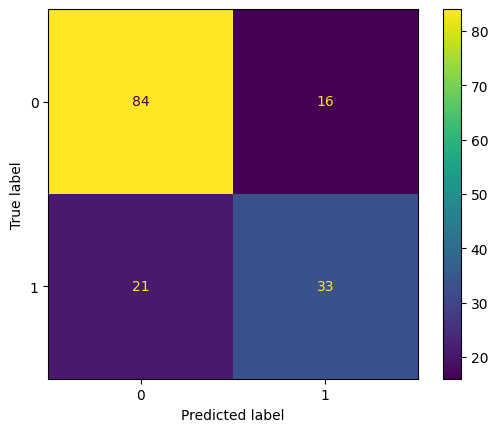

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, predicions)).plot()

دقة المودل ليست أفضل ما يكون، وهذا اما بسبب ان المودل لا يتناسب مع توزيع البيانات ولذا يجب اختيار مودل اخر

The SVC model is initialized with a linear kernel, meaning it will attempt to find a straight hyperplane that separates the data into classes.


In [18]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

## Prediction
y_pred=svc.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

[[87 13]
 [22 32]]


In [19]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred1=rbf.predict(x_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       100
           1       0.70      0.48      0.57        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154

[[89 11]
 [28 26]]


In [20]:
polynomial=SVC(kernel='poly')
polynomial.fit(x_train,y_train)
y_pred2=polynomial.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       100
           1       0.76      0.35      0.48        54

    accuracy                           0.73       154
   macro avg       0.74      0.65      0.65       154
weighted avg       0.74      0.73      0.70       154

[[94  6]
 [35 19]]


In [21]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)
## Prediction
y_pred3=sigmoid.predict(x_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

[[81 19]
 [22 32]]


K-Nearest Neighbors (KNN) Algorithm - Short Overview

How It Works:

	•	Instance-Based Learning: KNN stores the entire training dataset and does not build a model.
	•	Prediction:
	1.	Distance Calculation: Computes the distance between the new data point and all training points (using metrics like Euclidean or Manhattan distance).
	2.	Neighbor Identification: Selects the k nearest neighbors.
	3.	Majority Voting: For classification, assigns the most common class among the neighbors; for regression, averages the values.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=30)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.73      0.44      0.55        54

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



Making a prediction system

In [31]:
input_data = (9,112,82,24,0,28.2,1.282,50)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_as_np_array = input_data_as_np_array.reshape(1,-1)

std_data = scaler.transform(input_data_as_np_array)
predition = svc.predict(std_data)
print(predition)

if (predition[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
